In [1]:
import numpy as np
import pandas as pd




df = pd.read_csv("../cleaned-data.csv")
df = df.drop(columns=['Unnamed: 0'], axis=1)
df["START DATE"] = pd.to_datetime(df["START DATE"])
df["END DATE"] = pd.to_datetime(df["END DATE"])
df["coverage_period"] = df["END DATE"] - df["START DATE"]
df = df[["BIOGUIDE_ID", "QUARTER", "YEAR", "OFFICE", "CATEGORY", "PURPOSE", "PAYEE", "START DATE", "END DATE", "coverage_period", "AMOUNT"]]

df

/Users/arminkhayyer/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BIOGUIDE_ID,QUARTER,YEAR,OFFICE,CATEGORY,PURPOSE,PAYEE,START DATE,END DATE,coverage_period,AMOUNT
0,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,CONSERVATIVE OUTREACH DIRECTOR,ALTHOUSE JOSHUA S,2017-07-01,2017-09-30,91 days,20000.01
1,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,PRESS SECRETARY,ANDRES DOUGLAS R,2017-07-01,2017-09-30,91 days,27500.01
2,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,MEMBER SERVICES DIRECTOR,ANDREWS THOMAS S,2017-07-01,2017-09-30,91 days,32499.99
3,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,ASST TO THE SPEAKER FOR POLICY,ANTELL GEOFFREY,2017-07-01,2017-09-30,91 days,41250.00
4,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,SYSTEM ADMINISTRATOR,BENJAMIN WILLIAM C.,2017-07-01,2017-09-30,91 days,13250.01
5,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,DIR OF ADMIN OPERATIONS,BLAKE KRISTENE,2017-07-01,2017-09-30,91 days,33750.00
6,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,FINANCIAL ADMINISTRATOR,BLANKENSHIP APRIL L.,2017-07-01,2017-09-30,91 days,5862.75
7,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,COUNSELOR TO THE SPEAKER,BUCK BRENDAN K,2017-07-01,2017-09-30,91 days,43125.00
8,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,CHIEF OF STAFF,BURKS JONATHAN,2017-07-01,2017-09-30,91 days,43125.00
9,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,SHARED EMPLOYEE,BUSH NICHOLAS J,2017-07-01,2017-09-30,91 days,24999.99


question 1. What is the most expensive payee?
we have several payees,it's not good to just group buy that. what else we can do we can find the purpose of the largest amount payed. 

In [2]:
max_amount = df.loc[df.AMOUNT == max(df.AMOUNT), :]
print(max_amount)

       BIOGUIDE_ID QUARTER  YEAR                    OFFICE  \
184760         NaN  2017Q4  2017  GOVERNMENT CONTRIBUTIONS   

                  CATEGORY PURPOSE PAYEE START DATE   END DATE  \
184760  PERSONNEL BENEFITS    FERS       2017-12-01 2017-12-31   

       coverage_period      AMOUNT  
184760         30 days  6789603.47  


[['Rep' 'Mike' 'Rogers' 'R' 'M']]


No handles with labels found to put in legend.


[['Com' 'Pedro' 'Pierluisi' 'D' 'M']]


No handles with labels found to put in legend.


[['Rep' 'Mike' 'Kelly' 'R' 'M']]


No handles with labels found to put in legend.


[['Rep' 'Carolyn' 'Maloney' 'D' 'F']]


No handles with labels found to put in legend.


[['Rep' 'Don' 'Young' 'R' 'M']]


No handles with labels found to put in legend.


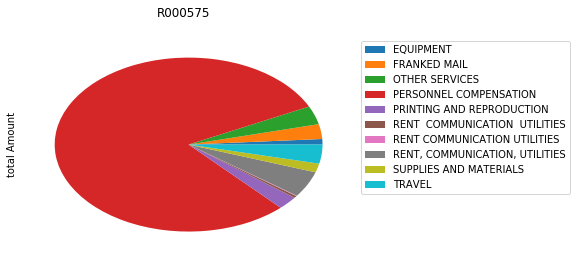

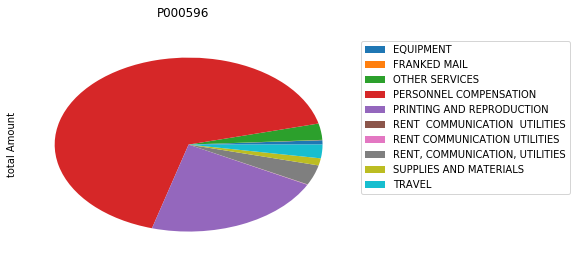

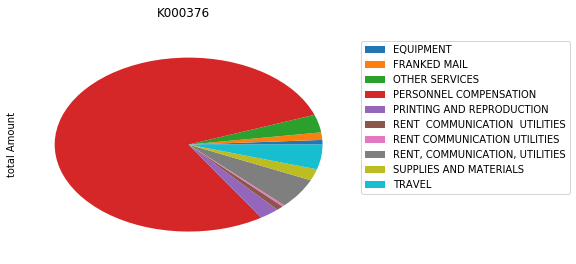

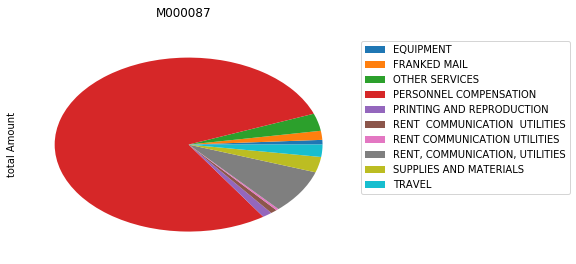

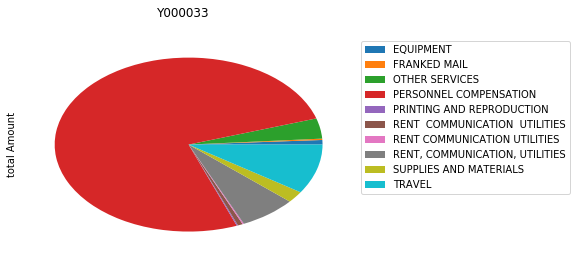

In [4]:
biodf = df.dropna(subset=["BIOGUIDE_ID"])
largest_bios = biodf.groupby(["BIOGUIDE_ID"])["AMOUNT"].sum().nlargest(5).index


import matplotlib.pyplot as plt 
legislators = pd.read_csv("../legislators_updated.csv")
for i in largest_bios:
    print(legislators.loc[legislators.bioguide_id == i, ["title", "firstname", "lastname", "party", "gender"]].values)
    a = biodf.loc[biodf.BIOGUIDE_ID == i, ["PURPOSE", "CATEGORY", "AMOUNT", "YEAR"]].groupby(["CATEGORY"])["AMOUNT"].aggregate(["sum"])
    a["total Amount"] = a["sum"]
    a = a[["total Amount"]]
    a.plot.pie(subplots=True, labels= None, title=i)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels= a.index)
                                                                                                                               
                                                                                                                               
                                                                                                                               

question 2. Which year was the most expensive year for the House?

           AMOUNT                      
             mean   count           sum
YEAR                                   
2010  2435.586580  413389  1.006845e+09
2011  2702.034817  386063  1.043156e+09
2012  2837.021456  351784  9.980188e+08
2013  2734.662510  335498  9.174738e+08
2014  2846.581721  325800  9.274163e+08
2015  2784.453582  333007  9.272425e+08
2016  2824.880631  334722  9.455497e+08
2017  3110.998444  294891  9.174054e+08


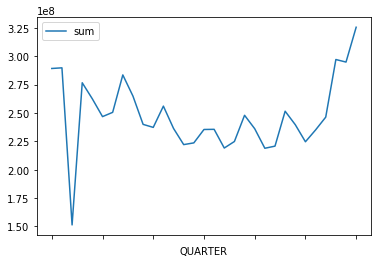

In [6]:

print(df.groupby(["YEAR"]).aggregate(["mean", "count", "sum"]))
quarterly_group = df.groupby(["QUARTER"])["AMOUNT"].aggregate([ "sum"])
quarterly_group.plot()



(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(3,)


ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

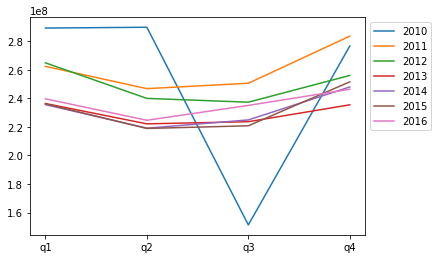

In [9]:
import matplotlib.pyplot as plt 

for i in range(2010, 2018):
    a = df.loc[df.YEAR == i, :].groupby(["QUARTER"])["AMOUNT"].sum()
    y = a.values
    print (y.shape)
    xlablels= ["q1", "q2", "q3", "q4"]
    plt.plot(xlablels, y, label= i)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    
    
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1180a6940>],
      dtype=object)

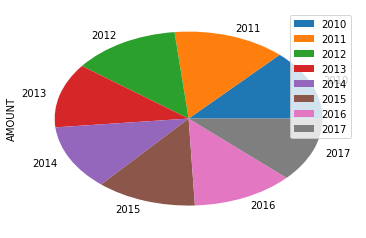

In [10]:
# pie chart yearly
df.groupby(["YEAR"]).sum().plot.pie(subplots=True)

#plot.pie(subplots=True)


question 3. Graphic How expenses changed during time?

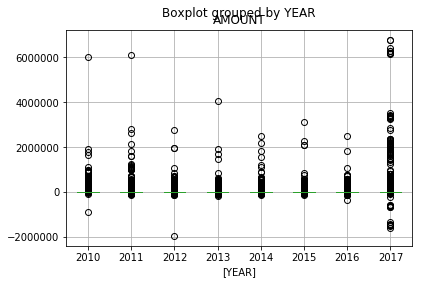

In [11]:
df.boxplot(column= ["AMOUNT"], by= ["YEAR"], showbox=True)

question 4. Which office was the most expensive in each year?

In [12]:
max_OFFICE = df.groupby(["YEAR", "OFFICE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("the most expensive office in year {} is ".format(i), max_OFFICE[i].idxmax(), "with total expenditure of", max_OFFICE[i].max())

the most expensive office in year 2010 is  HOUSE INFORMATION RESOURCES with total expenditure of 35293000.74999965
the most expensive office in year 2011 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 140495758.15000015
the most expensive office in year 2012 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 120877032.13999988
the most expensive office in year 2013 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109105027.95000017
the most expensive office in year 2014 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109211560.04999961
the most expensive office in year 2015 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 87561524.60000005
the most expensive office in year 2016 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 126043024.37000008
the most expensive office in year 2017 is  GOVERNMENT CONTRIBUTIONS with total expenditure of 187732923.96000028


question 6. What is the most commun purpose to spend money in House?

In [13]:
#yearly Federal Employees Retirement System as FERS
max_Purpose = df.groupby(["YEAR", "PURPOSE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("the most expensive PURPOSE in year {} is ".format(i), max_Purpose[i].idxmax(), "with total expenditure of", max_Purpose[i].max())

the most expensive PURPOSE in year 2010 is  CHIEF OF STAFF with total expenditure of 44299411.83999991
the most expensive PURPOSE in year 2011 is  CHIEF OF STAFF with total expenditure of 54147818.38
the most expensive PURPOSE in year 2012 is  CHIEF OF STAFF with total expenditure of 53421922.74999992
the most expensive PURPOSE in year 2013 is  CHIEF OF STAFF with total expenditure of 56105506.47999993
the most expensive PURPOSE in year 2014 is  CHIEF OF STAFF with total expenditure of 57171284.24000005
the most expensive PURPOSE in year 2015 is  CHIEF OF STAFF with total expenditure of 58300528.569999985
the most expensive PURPOSE in year 2016 is  CHIEF OF STAFF with total expenditure of 59641340.92999996
the most expensive PURPOSE in year 2017 is  FERS with total expenditure of 57445787.989999995


In [14]:
# overall
df.groupby(["PURPOSE"])["AMOUNT"].sum().idxmax()


'CHIEF OF STAFF'

question 7. How much was the total expenditure for each purpose? we have so many purposes, it's not a good idea to check for all of those. instead we can check for the top 5 or 10 

In [15]:
print(df.groupby(["PURPOSE"])["AMOUNT"].sum().nlargest(5))




PURPOSE
CHIEF OF STAFF                  4.292033e+08
STAFF ASSISTANT                 2.589278e+08
LEGISLATIVE ASSISTANT           2.293613e+08
TECHNOLOGY SERVICE CONTRACTS    2.243267e+08
DISTRICT DIRECTOR               2.058145e+08
Name: AMOUNT, dtype: float64


question 8. Graphic of total expenses in each year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118097a90>]],
      dtype=object)

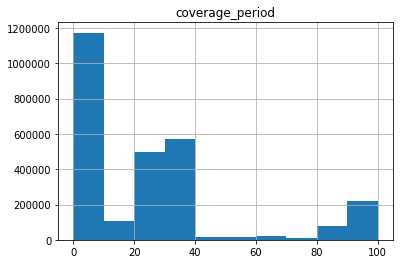

In [17]:
# histogram of coverage periods 
df["coverage_period"] =df["coverage_period"].dt.days
dfnew = df.loc[(df["coverage_period"] >=0) & (df["coverage_period"] <=100), : ]
dfnew.hist(column= ["coverage_period"], bins=10)

['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']


<BarContainer object of 11 artists>

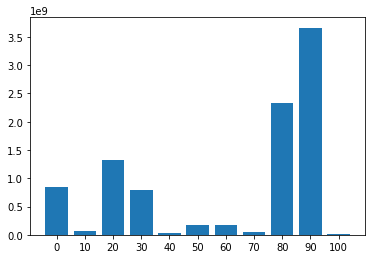

In [18]:
bins = []
performance = np.arange(0, 110, 10)
performance = [str(i) for i in performance]
print (performance)
for i in range(0, 110, 10):
    a = df.loc[(df["coverage_period"] >=i) & (df["coverage_period"] <= i +10), :]
    bins.append(sum(a.AMOUNT))

plt.bar(performance, bins, align='center')



question 9. Graphic of total expensen in each year considering quarters.

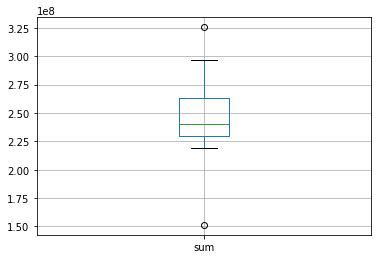

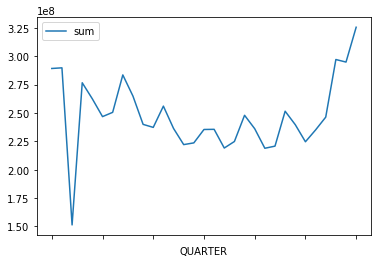

In [19]:
quarterly = df.groupby(["QUARTER"])["AMOUNT"].aggregate(["sum"])


dfquarterly = pd.DataFrame(quarterly)
#dfquarterly.index
quarterly.boxplot()
quarterly.plot(x=dfquarterly.index)






question 10. Graphic of comparing the expense of each office during year... (can be lines for each office)
11. Changes in aggregate House expenditures (arranged by 2009 expenditure size)
12. Changes in staffing force, by position (for 20 most expensive positions by total expenditures, arranged from biggest decline to biggest gain)
13. 

In [89]:
 #changes for personal compensation in percentile- the first 5 largest and smallest.
    
from congress import Congress
personal_comp_df = df.loc[df.CATEGORY == "PERSONNEL COMPENSATION", :]
#print(personal_comp_df.loc[df.PAYEE == "AVANT, ISSAC L", :])
MOST_EXP_EMP = list(personal_comp_df.groupby([ "BIOGUIDE_ID"])["AMOUNT"].sum().nlargest(5).index)





api_key = 'Z7cnuQ3cufA08VfbWOoqURVpeSUuyT8QQazVwAGY'
congress = Congress(api_key)
congressmans = [congress.members.get(i) for i in MOST_EXP_EMP]



required_data = ["title", "state", "party", "committees" ]    
final = []
for i in congressmans:
    raw_dict = i["roles"][0]
    congressman_info = dict((key,value) for key, value in raw_dict.items() if key in required_data)
    final.append(congressman_info)
    
for i in final:
    congressman_comittee = i["committees"][0]["name"]
    i.pop("committees")
    i.update({"committee":congressman_comittee})

for i in final: 
    index = final.index(i)
    i.update({"Name":(congressmans[index]["first_name"] + " " +  congressmans[index]["last_name"] )})



final_df = []
for i in MOST_EXP_EMP:
    a = personal_comp_df.loc[df.BIOGUIDE_ID == i, :]["AMOUNT"].sum()
    unique_number_of_payee = len(personal_comp_df.loc[df.BIOGUIDE_ID == i, ["PAYEE"]]["PAYEE"].unique())
    total_expenditure = df.loc[df.BIOGUIDE_ID == i, "AMOUNT"].sum()
    percentage = str(np.round(a/total_expenditure * 100, decimals=2)) + "%"
    index = MOST_EXP_EMP.index(i)
    final[index].update({"total":a, "number of staff": unique_number_of_payee, "Bio Guide ID": i, "Percentage":percentage})
    final_df.append(final[index])

    
final_df = pd.DataFrame.from_dict(final_df)
final_df.head()



,Bio Guide ID,Name,Percentage,committee,number of staff,party,state,title,total
0,R000575,Mike Rogers,79.86%,Committee on Agriculture,106,R,AL,Representative,11094491.61
1,K000376,Mike Kelly,78.57%,Committee on Ways and Means,130,R,PA,Representative,10132909.44
2,N000002,Jerrold Nadler,82.16%,Committee on the Judiciary,70,D,NY,Representative,8794959.84
3,T000460,Mike Thompson,83.5%,Committee on Ways and Means,86,D,CA,Representative,8723992.81
4,M000087,Carolyn Maloney,78.64%,Joint Economic Committee,85,D,NY,Representative,8686239.42


In [20]:
df.groupby(["OFFICE"])["AMOUNT"].sum().nlargest(5)

OFFICE
CHIEF ADMIN OFCR OF THE HOUSE     8.186229e+08
GOVERNMENT CONTRIBUTIONS          3.151011e+08
COMMITTEE ON APPROPRIATIONS       1.881419e+08
CLERK OF THE HOUSE                1.709014e+08
COMMITTEE ON ENERGY & COMMERCE    7.876479e+07
Name: AMOUNT, dtype: float64

14- expenditure for each party in each years. 
15- group by states 
16 - group by party, year, purpose 
17 - bar charts for parties in each year
18- check to see what purposes caused the expenditure for coverage perioed between the range oof 80-90
19- changes for personal compensation in percentile- the first 5 largest and smallest. 
20 - bar chart, yearly, with categories showed by different colors. 

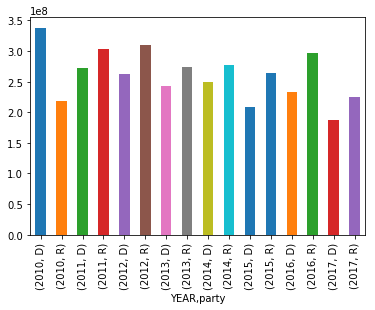

In [199]:
#14- expenditure for each party in each years.
unique_biodf = df.dropna(subset=["BIOGUIDE_ID"])
unique_biodf = unique_biodf.groupby([ "YEAR","BIOGUIDE_ID"])["AMOUNT"].aggregate(['sum'])
#unique_biodf["BIOGUIDE_ID"] = unique_biodf.index
unique_biodf = unique_biodf.reset_index()
legis = pd.read_csv("../legislators_updated.csv")


def find_party(row):
    bio = row.BIOGUIDE_ID
    party =  legis.loc[legis.bioguide_id == bio, "party"].values
    return str(party)[2:3]
    
unique_biodf["party"] = unique_biodf.apply(lambda row: find_party(row), axis= 1)

unique_biodf = unique_biodf.loc[unique_biodf.party != "", :]
unique_biodf.groupby(["YEAR", "party"])["sum"].sum().plot(kind ="bar")

    

#unique_biodf["party"] = legislators.loc[legislators.bioguide_id == df.BIOGUIDE_ID, "party"]